<a href="https://colab.research.google.com/github/Erasnilson/Analise-fraude-Bagging-tree-vs-knn/blob/main/Analise_Fraude_Bagging_tree_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Análise de detecção de fraude via Ensemble Bagging (tree vs knn)

O Bagging (Bootstrap Aggregating) é um método de ensemble que visa melhorar a performance de algoritmos de aprendizado de máquina, principalmente modelos de previsão. Ele funciona treinando múltiplos modelos **em subconjuntos aleatórios do conjunto de dados** e combinando suas previsões para obter uma previsão final mais robusta.

A seguir utilizaremos o conjunto de dados disponível no Kaggle para exemplificar as técnicas de classificação aplicadas à análise de fraudes em cartões de crédito.(https://www.kaggle.com/code/renjithmadhavan/credit-card-fraud-detection-using-python/input)

##  Avaliando o desempenho do algoritmo Bagging

- **Treinamento de Modelos**: o mesmo algoritmo é treinado em diferentes subconjuntos, o que pode ajudar a reduzir a variância e melhorar a generalização.

- **Combinação das Previsões**: para tarefas de classificação, a previsão final é feita por votação majoritária (a classe mais frequente entre as previsões dos modelos). Para tarefas de regressão, a previsão final é a média das previsões dos modelos individuais.

# Vantagens do Bagging:

- **Redução da Variância**: Como o Bagging treina vários modelos em subconjuntos diferentes, ele reduz a variância dos modelos individuais e melhora a estabilidade.

- **Melhoria na Generalização**: Ao combinar múltiplos modelos, o Bagging tende a melhorar a performance geral e reduzir o risco de overfitting.

- **Robustez**: É menos sensível a flutuações nos dados de treinamento, tornando o modelo mais robusto.

Em síntese, o algoritmo reduz as chances de ocorrer overfitting. Assim constroi vários estimadores, utilizando o mesmo modelo, por várias vezes e, calcula uma média dos modelos individuais.

# Hiperparâmetros utilizados

(DecisionTreeClassifier(min_samples_leaf=3, min_samples_split=5, random_state=10)

Porém, é possível optar pelo algoritmo de árvore de decisão, ou KNN, ou Regressão Linear.

- min_samples_leaf=3 -> cada folha da árvore deve ter pelo menos 3 amostras.
- min_samples_split=5 -> um nó só será dividido se contiver pelo menos 5 amostras.
- random_state=10 -> define uma semente específica para o gerador de números aleatórios

(KNeighborsClassifier(n_neighbors=3))

In [1]:
import numpy as np
import pandas as pd               # manipulação de data frames no python
import matplotlib.pyplot as plt   # plots/gráficos
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/kaggle'

In [5]:
!kaggle datasets download -d mlg-ulb/creditcardfraud

Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
 97% 64.0M/66.0M [00:00<00:00, 95.1MB/s]
100% 66.0M/66.0M [00:00<00:00, 95.6MB/s]


In [4]:
import zipfile

# Define the path to your zip file
file_path = '/content/creditcardfraud.zip'  # Replace 'your_file.zip' with your file's name


In [7]:
# Unzip the file to a specific destination
with zipfile.ZipFile(file_path, 'r') as zip_ref:
    zip_ref.extractall('/content')  # Replace 'destination_folder' with your desired folder

In [8]:
df = pd.read_csv('/content/creditcard.csv')
print(df.shape)
df.head()


(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
#df.info()

## Síntes dos dados



In [10]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [11]:
# A variável class denota o presença e ausência de fraude
class_names = {0:'Not Fraud', 1:'Fraud'}
print(df.Class.value_counts().rename(index = class_names))

Class
Not Fraud    284315
Fraud           492
Name: count, dtype: int64


## Modelagem de Classificação
Amostragem do conjunto de dados em:
- 70% Treino
- 30% Teste

In [12]:
#from sklearn import datasets

# import das classes dos algoritmos de classificação
from sklearn.tree import DecisionTreeClassifier     # Arvore de decisao
from sklearn.neural_network import MLPClassifier    # MLP
from sklearn.neighbors import KNeighborsClassifier  # k-NN

# import das classes dos algoritmos de ensemble
from sklearn.ensemble import VotingClassifier, BaggingClassifier, AdaBoostClassifier, RandomForestClassifier

# import das metodologias de experientação
from sklearn.model_selection import train_test_split # holdout
from sklearn.metrics import accuracy_score           # acurácia

In [13]:
feature_names = df.iloc[:, 1:30].columns
target = df.iloc[:1, 30: ].columns
print(feature_names) # Coveriáveis X
print(target) # Va Resposta Y

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')
Index(['Class'], dtype='object')


In [14]:
data_features = df[feature_names]
data_target = df[target]

In [15]:
# seed para reprodução dos experimentos
seed = 10

In [16]:
# Separar os conjuntos de treino e teste
# - usaremos holdout
# - 2/3 dos exemplos compõem o conjunto de treinamento
# - 1/3 dos exemplos compõem o conjunto de teste
# a amostragem é estratificada (stratify)

[X_train, X_test, y_train, y_test] = train_test_split(data_features, data_target, test_size=0.30, stratify=data_target, random_state=seed)
print("*** Dimensões dos conjuntos de dados ***")
print("- (X_train) Conjunto de treinamento:\t\t", X_train.shape)
print("- (y_train) Rótulos do conjunto de treinamento:\t", y_train.shape)
print("- (X_test) Conjunto de teste:\t\t\t", X_test.shape)
print("- (y_test) Rótulos do conjunto de teste:\t",y_test.shape)

*** Dimensões dos conjuntos de dados ***
- (X_train) Conjunto de treinamento:		 (199364, 29)
- (y_train) Rótulos do conjunto de treinamento:	 (199364, 1)
- (X_test) Conjunto de teste:			 (85443, 29)
- (y_test) Rótulos do conjunto de teste:	 (85443, 1)


In [17]:
# Convertendo os conjuntos de dados do formato do pandas para numpy array
y_train_values = y_train.values.ravel().astype(int)
x_train_values = X_train.values

In [19]:
# Induzindo um ensemble (Bagging)
tree_bagging = BaggingClassifier(estimator=tree, n_estimators=10, random_state=seed)
tree_bagging.fit(x_train_values, y_train_values)

BaggingClassifier(estimator=DecisionTreeClassifier(min_samples_leaf=3,
                                                   min_samples_split=5,
                                                   random_state=10),
                  random_state=10)

In [20]:
# Obter informações sobre folhas e splits para cada árvore
for i, tree in enumerate(tree_bagging.estimators_):
    n_leaves = tree.tree_.n_leaves
    n_nodes = tree.tree_.node_count
    n_splits = n_nodes - n_leaves  # Os nós internos são splits
    print(f"Árvore {i + 1}:")
    print(f"  Número de folhas: {n_leaves}")
    print(f"  Número de splits: {n_splits}")

Árvore 1:
  Número de folhas: 92
  Número de splits: 91
Árvore 2:
  Número de folhas: 87
  Número de splits: 86
Árvore 3:
  Número de folhas: 73
  Número de splits: 72
Árvore 4:
  Número de folhas: 82
  Número de splits: 81
Árvore 5:
  Número de folhas: 82
  Número de splits: 81
Árvore 6:
  Número de folhas: 95
  Número de splits: 94
Árvore 7:
  Número de folhas: 80
  Número de splits: 79
Árvore 8:
  Número de folhas: 86
  Número de splits: 85
Árvore 9:
  Número de folhas: 93
  Número de splits: 92
Árvore 10:
  Número de folhas: 94
  Número de splits: 93


In [21]:
knn_bagging = BaggingClassifier(estimator=KNeighborsClassifier(n_neighbors=3), n_estimators=10, random_state=seed)
knn_bagging.fit(x_train_values, y_train_values)


BaggingClassifier(estimator=KNeighborsClassifier(n_neighbors=3),
                  random_state=10)

# Resultados

In [23]:
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score

# Resultados para Bagging tree
tree_y_test_pred_bagging = tree_bagging.predict(X_test)
tree_bagging_acc = round(accuracy_score(y_test.values, tree_y_test_pred_bagging), 4)
tree_bagging_precision = round(precision_score(y_test.values, tree_y_test_pred_bagging), 4)
tree_bagging_recall_score = round(recall_score(y_test.values, tree_y_test_pred_bagging), 4)
tree_bagging_f1_score = round(f1_score(y_test.values, tree_y_test_pred_bagging), 4)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but BaggingClassifier was fitted without feature names
  warnings.warn(


# Considerações Importantes:

- Bootstrap: Mesmo que o KNN não construa um modelo explícito, o BaggingClassifier ainda pode melhorar a generalização usando amostragem bootstrap, o que significa que cada KNN verá uma amostra diferente do conjunto de treinamento.

- Tamanho do Conjunto de Dados: Como o KNN é computacionalmente intensivo em termos de tempo de previsão, usar bagging com muitos estimadores pode aumentar significativamente o tempo de previsão.

In [24]:
# Resultados para Bagging knn
knn_y_test_pred_bagging = knn_bagging.predict(X_test)
knn_bagging_acc = round(accuracy_score(y_test.values, knn_y_test_pred_bagging), 4)
knn_bagging_precision = round(precision_score(y_test.values, knn_y_test_pred_bagging), 4)
knn_bagging_recall_score = round(recall_score(y_test.values, knn_y_test_pred_bagging), 4)
knn_bagging_f1_score = round(f1_score(y_test.values, knn_y_test_pred_bagging), 4)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but BaggingClassifier was fitted without feature names
  warnings.warn(


In [25]:
print("*** Desempenho dos algoritmos *** ")

print("Accuracy for Bagging tree Model : {tree_bagging_acc}".format(tree_bagging_acc  = tree_bagging_acc ))
print("Precision for Bagging tree Model : {tree_bagging_precision}".format(tree_bagging_precision  = tree_bagging_precision ))
print("Sensitivity/Recall for Bagging tree Model : {tree_bagging_recall_score}".format(tree_bagging_recall_score  = tree_bagging_recall_score ))
print("F1 Score for Bagging tree Model : {tree_bagging_f1_score}".format(tree_bagging_f1_score = tree_bagging_f1_score))

print("Accuracy for Bagging knn Model : {knn_bagging_acc}".format(knn_bagging_acc  = knn_bagging_acc ))
print("Precision for Bagging knn Model : {knn_bagging_precision}".format(knn_bagging_precision  = knn_bagging_precision ))
print("Sensitivity/Recall for Bagging knn Model : {knn_bagging_recall_score}".format(knn_bagging_recall_score  = knn_bagging_recall_score ))
print("F1 Score for Bagging knn Model : {knn_bagging_f1_score}".format(knn_bagging_f1_score = knn_bagging_f1_score))


*** Desempenho dos algoritmos *** 
Accuracy for Bagging tree Model : 0.9995
Precision for Bagging tree Model : 0.8984
Sensitivity/Recall for Bagging tree Model : 0.777
F1 Score for Bagging tree Model : 0.8333
Accuracy for Bagging knn Model : 0.9992
Precision for Bagging knn Model : 0.902
Sensitivity/Recall for Bagging knn Model : 0.6216
F1 Score for Bagging knn Model : 0.736


- Na avaliação realizada, nota-se que utilizando o método da árvore de decisão demonstrou um F1 Score melhor. Além disso, vale salientar que o tempo de processo computacional do Bagging-knn (18min), nesta análise, foi estremamente demorado.

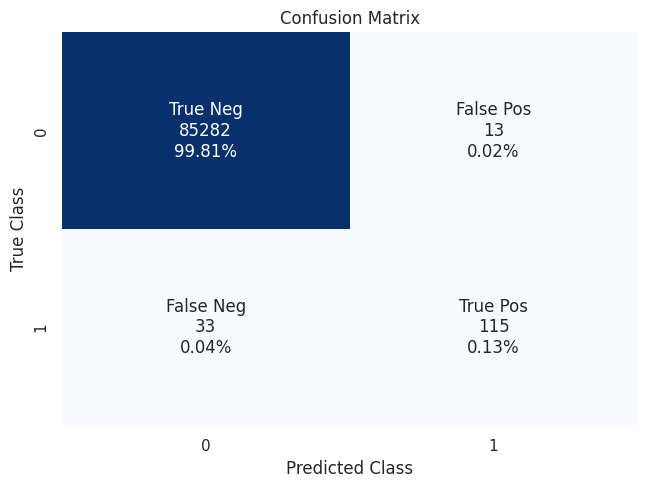

In [26]:
from sklearn.metrics import confusion_matrix
#Baggin com metodo tree

#class_names = ['not_fraud', 'fraud']
matrix = confusion_matrix(y_test.values, tree_y_test_pred_bagging)


group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     matrix.flatten()/np.sum(matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# Create heatmap
sns.heatmap(matrix,cbar=None, annot=labels, fmt='', cmap='Blues')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

## Acurácia

A Acurácia é uma métrica que indica a proporção de previsões corretas feitas pelo modelo em relação ao total de previsões

\begin{equation}
\text{Acurácia} = \frac{\text{Número de Previsões Corretas}}{\text{Número Total de Previsões}}
\end{equation}



## Sensibilidade

 A sensibilidade do modelo, também conhecida como taxa de verdadeiro positivo (True Positive Rate), é uma métrica utilizada em modelos de classificação para avaliar o desempenho do modelo. Esta métrica indica a capacidade do modelo de identificar corretamente as ocorrências de uma classe positiva (por exemplo, casos de uma doença, fraudes, etc.).

\begin{equation}
\text{Sensibilidade} = \frac{\text{Verdadeiros Positivos (TP)}}{\text{Verdadeiros Positivos (TP)} + \text{Falsos Negativos (FN)}}
\end{equation}

- Verdadeiros Positivos (TP): Casos onde o modelo previu corretamente a classe positiva.

- Falsos Negativos (FN): Casos onde o modelo previu incorretamente a classe negativa, ou seja, deixou de identificar uma ocorrência positiva.





## Precisão

A precisão do modelo é particularmente importante em aplicações onde os falsos positivos têm um custo elevado, como na detecção de fraudes, diagnósticos médicos ou filtros de spam. No entanto, aumentar a precisão pode diminuir a sensibilidade e vice-versa.

\begin{equation}
\text{Precisão} = \frac{\text{Verdadeiros Positivos (TP)}}{\text{Verdadeiros Positivos (TP)} + \text{Falsos Positivos (FP)}}
\end{equation}

- Verdadeiros Positivos (TP): Casos onde o modelo previu corretamente a classe positiva.

- Falsos Positivos (FP): Casos onde o modelo previu a classe positiva incorretamente (ou seja, a previsão foi positiva, mas a instância era realmente negativa).

## F1 Score

O F1 Score é a média harmônica entre a precisão e a sensibilidade, é utilizada onde há um desequilíbrio de classes, ou seja, quando uma classe é muito mais frequente do que outra. Assim,  **para valores próximo a 1**, tem-se o melhor desempenho possível.

\begin{equation}
F1 = 2 \cdot \frac{\text{Precisão} \cdot \text{Sensibilidade}}{\text{Precisão} + \text{Sensibilidade}}
\end{equation}

